In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
# import langchain
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 600
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8) 
import matplotlib.cm as cm
import seaborn as sns
import time, os, copy
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering
from langchain import LLMChain
import openai
import random
# from snn import SNN
from scipy.spatial import distance
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',300)
from scipy.cluster.hierarchy import dendrogram
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
import scipy

In [3]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [ ]:
## Please set the OpenAI API key variable as:
%env OPENAI_API_KEY="your_api_key_here"
client = OpenAI()

## Get themes for all chunks

In [ ]:
df =pd.read_csv('res_full_labeled.csv', converters = {'Request': str, 'Response': str})
df = df[df["GPT4o_Ad"] == "Yes"]
print(f"original size of the data set: {df.shape}")
print(f"size of the final data set: {df.shape}")

original size of the data set: (11335, 19)
size of the final data set: (11335, 19)


In [9]:
df["Theme"] = "NOTHEME"

In [10]:
df.head()

idx          ID               Category                         Skill Name  \
13   13  B0BNVRCRDP  Education & Reference        Coates Paralegal Flashcards   
20   20  B07L4KJ1SR  Education & Reference                     Stunning Facts   
33   33  B07P7MZLBT  Education & Reference             Andys Accordion Lesson   
35   35  B07KXWK793  Education & Reference                    Louisiana Facts   
38   38  B09DSZGFN3  Education & Reference  Marymount School Technology Facts   

                      Developer  \
13  Digital Media Program / JCC   
20                          RDP   
33                  Andy Nelson   
35                  Best Design   
38               Eric A Walters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description  \
13                                                                                                      Alexa can help you learn new topics or study for your test. You can review the flash cards and then test your knowledge. At any point you can say "Alexa, review mode" to switch to review or say "Alexa, test mode" to start a test. You can say "Alexa, next" to move to the next card. At any point during the test, you can say "Alexa, what's my score" to get your current test score.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
20                                                                                                                                                                                                                                                                                                                        This skill will help you learn a range of mind-blowing facts.\nPlease leave a 5-star review if you love this skill. Your 5-star reviews encourage us to keep making more great skills, thanks!\n\nThis skill was built with love by VoiceApps.com.  Visit us to create your own skill in minutes!   
33                                                                                                                                                                                                                                                                                       Ask Alexa for an interesting list of facts about your topic of choice. When using the skill, you can say "Alexa, next" to move to the next fact. At any point, you can say "Alexa, stop" to exit the skill.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
35  Louisiana Facts is a skill that help you to learn more about Interesting Louisiana Facts.\n\n\nThe skill will loop automatically,to pause it just  say " Stop"\n \nTo start the skill just say:\n\n"Alexa,open Louisiana Facts"\n"Alexa, start Louisiana Facts"\n"Alexa, launch Louisiana Facts"\n\nIf you want to make pause or stop just say : "Stop"\nif you need help just say : "help"\n\nTo activate the skill: Search for the mobile app Alexa or Amazon.com for "Louisiana Facts"\n\nOn the "Louisiana Facts" skill page, click the Activate button.\n\n\nPlease leave a 5-star review if you love this skil...   
38                                                                                                                                                                                                                                                                             

In [ ]:
# flat_cluster_dict = {
#     'resp_text' : [],
#     'cluster' : [],
#     'theme': []
# }

count = 0
themes = []

def get_single_prompt():
    system_template = "You are a personal assistant and you are helping me assign a theme for an advertisement or promotional text sourced from Amazon Alexa skill response. Please assign a short high level theme or a category to the advertisement."
    human_template = "Provide a concise summary or high level theme in a few words for the following promotional text:\n\nAD:{ad}\n\nTHEME:"

    return ChatPromptTemplate(
        messages=[
            SystemMessagePromptTemplate.from_template(system_template),
            HumanMessagePromptTemplate.from_template(human_template),
        ],
        input_variables=["ad"],
    )

# for text in tqdm(list(df['Response'])):
for index, row in tqdm(df.iterrows()):
    chain_single = LLMChain(
        llm=ChatOpenAI(temperature=0, model_name="gpt-4o-2024-08-06", openai_api_key=openai.api_key, request_timeout=30), prompt=get_single_prompt(), verbose=False
    )
    ad_str = row['Response']
    print("Ad: ", ad_str)
    
    theme = chain_single.run(
        {
            "ad": ad_str,
        }
    )
    theme = theme.strip("\"")
    count+=1
    print("Theme: ", theme)

    # if count > 10:
    #     break
    
    themes.append(theme)
    df.loc[index, "Theme"] = theme
    df.to_csv('res_full_labeled_with_themes.csv', header=True, encoding='utf-8', index=0)
    # print("Ad theme: ", theme)
    time.sleep(0.15)
    # break

# df['Theme'] = themes
# df.to_csv('res_full_labeled_with_themes.csv', index=0)
# df.head(5)

0it [00:00, ?it/s]

Ad:  Ok, Here's Coates Paralegal Flashcards. <Short audio>. Welcome to coates paralegal flashcards The big test is coming up. Study as much as you can before then.. Which mode would you like: review or test?
Theme:  Legal Exam Preparation
Ad:  Ok, Here's Stunning facts. Welcome. Here is your fact. Coca-Cola would be green if coloring wasn‚Äôt added to it. Do you want to listen another fact. say yes or no.
Theme:  Fun Facts and Trivia
Ad:  Here's a fact: If you go to andrew the malibu on you tube you can hear and see him playing a song or 2 Ready to hear some more?
Theme:  Music Promotion
Ad:  Handing off to Louisiana Facts by Best Design . Here's your fact... Saint Joseph's Cemetery, the only known United States cemetery facing north-south is in Rayne.
Theme:  Unique Louisiana Trivia
Ad:  Marymount has a 1:1 iPad program for students in grades N-5. Marymount received a 3000'$' grant from ESIP to support the Atmospheric Science class' Youth Climate Conference. Want some more?
Theme:  Ed

In [15]:
df.head()

idx          ID               Category                         Skill Name  \
13   13  B0BNVRCRDP  Education & Reference        Coates Paralegal Flashcards   
20   20  B07L4KJ1SR  Education & Reference                     Stunning Facts   
33   33  B07P7MZLBT  Education & Reference             Andys Accordion Lesson   
35   35  B07KXWK793  Education & Reference                    Louisiana Facts   
38   38  B09DSZGFN3  Education & Reference  Marymount School Technology Facts   

                      Developer  \
13  Digital Media Program / JCC   
20                          RDP   
33                  Andy Nelson   
35                  Best Design   
38               Eric A Walters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description  \
13                                                                                                      Alexa can help you learn new topics or study for your test. You can review the flash cards and then test your knowledge. At any point you can say "Alexa, review mode" to switch to review or say "Alexa, test mode" to start a test. You can say "Alexa, next" to move to the next card. At any point during the test, you can say "Alexa, what's my score" to get your current test score.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
20                                                                                                                                                                                                                                                                                                                        This skill will help you learn a range of mind-blowing facts.\nPlease leave a 5-star review if you love this skill. Your 5-star reviews encourage us to keep making more great skills, thanks!\n\nThis skill was built with love by VoiceApps.com.  Visit us to create your own skill in minutes!   
33                                                                                                                                                                                                                                                                                       Ask Alexa for an interesting list of facts about your topic of choice. When using the skill, you can say "Alexa, next" to move to the next fact. At any point, you can say "Alexa, stop" to exit the skill.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
35  Louisiana Facts is a skill that help you to learn more about Interesting Louisiana Facts.\n\n\nThe skill will loop automatically,to pause it just  say " Stop"\n \nTo start the skill just say:\n\n"Alexa,open Louisiana Facts"\n"Alexa, start Louisiana Facts"\n"Alexa, launch Louisiana Facts"\n\nIf you want to make pause or stop just say : "Stop"\nif you need help just say : "help"\n\nTo activate the skill: Search for the mobile app Alexa or Amazon.com for "Louisiana Facts"\n\nOn the "Louisiana Facts" skill page, click the Activate button.\n\n\nPlease leave a 5-star review if you love this skil...   
38                                                                                                                                                                                                                                                                             

## Making TFIDF out of themes

In [18]:
corpus = list(df['Theme'])
vectorizer = TfidfVectorizer()
TFIDF_matrix = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['19', '1980s', '24', ..., 'youtube', 'zodiac', 'zoo'], dtype=object)

In [19]:
TFIDF_Encodings = TFIDF_matrix.todense().tolist()
df['TFIDF_encoding'] = TFIDF_Encodings
df.head(5)

idx          ID               Category                         Skill Name  \
13   13  B0BNVRCRDP  Education & Reference        Coates Paralegal Flashcards   
20   20  B07L4KJ1SR  Education & Reference                     Stunning Facts   
33   33  B07P7MZLBT  Education & Reference             Andys Accordion Lesson   
35   35  B07KXWK793  Education & Reference                    Louisiana Facts   
38   38  B09DSZGFN3  Education & Reference  Marymount School Technology Facts   

                      Developer  \
13  Digital Media Program / JCC   
20                          RDP   
33                  Andy Nelson   
35                  Best Design   
38               Eric A Walters   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Description  \
13                                                                                                      Alexa can help you learn new topics or study for your test. You can review the flash cards and then test your knowledge. At any point you can say "Alexa, review mode" to switch to review or say "Alexa, test mode" to start a test. You can say "Alexa, next" to move to the next card. At any point during the test, you can say "Alexa, what's my score" to get your current test score.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
20                                                                                                                                                                                                                                                                                                                        This skill will help you learn a range of mind-blowing facts.\nPlease leave a 5-star review if you love this skill. Your 5-star reviews encourage us to keep making more great skills, thanks!\n\nThis skill was built with love by VoiceApps.com.  Visit us to create your own skill in minutes!   
33                                                                                                                                                                                                                                                                                       Ask Alexa for an interesting list of facts about your topic of choice. When using the skill, you can say "Alexa, next" to move to the next fact. At any point, you can say "Alexa, stop" to exit the skill.\nThis skill was created using a Skill Blueprint.  Your requests to this skill are not shared with the skill developer.   
35  Louisiana Facts is a skill that help you to learn more about Interesting Louisiana Facts.\n\n\nThe skill will loop automatically,to pause it just  say " Stop"\n \nTo start the skill just say:\n\n"Alexa,open Louisiana Facts"\n"Alexa, start Louisiana Facts"\n"Alexa, launch Louisiana Facts"\n\nIf you want to make pause or stop just say : "Stop"\nif you need help just say : "help"\n\nTo activate the skill: Search for the mobile app Alexa or Amazon.com for "Louisiana Facts"\n\nOn the "Louisiana Facts" skill page, click the Activate button.\n\n\nPlease leave a 5-star review if you love this skil...   
38                                                                                                                                                                                                                                                                             

In [20]:
TFIDF_X = np.vstack(df.TFIDF_encoding.values)
print(f"size of the matrix is:{TFIDF_X.shape}")
print(f"The dimention of vector embedding is {TFIDF_X.shape[1]}")

size of the matrix is:(11335, 2734)
The dimention of vector embedding is 2734


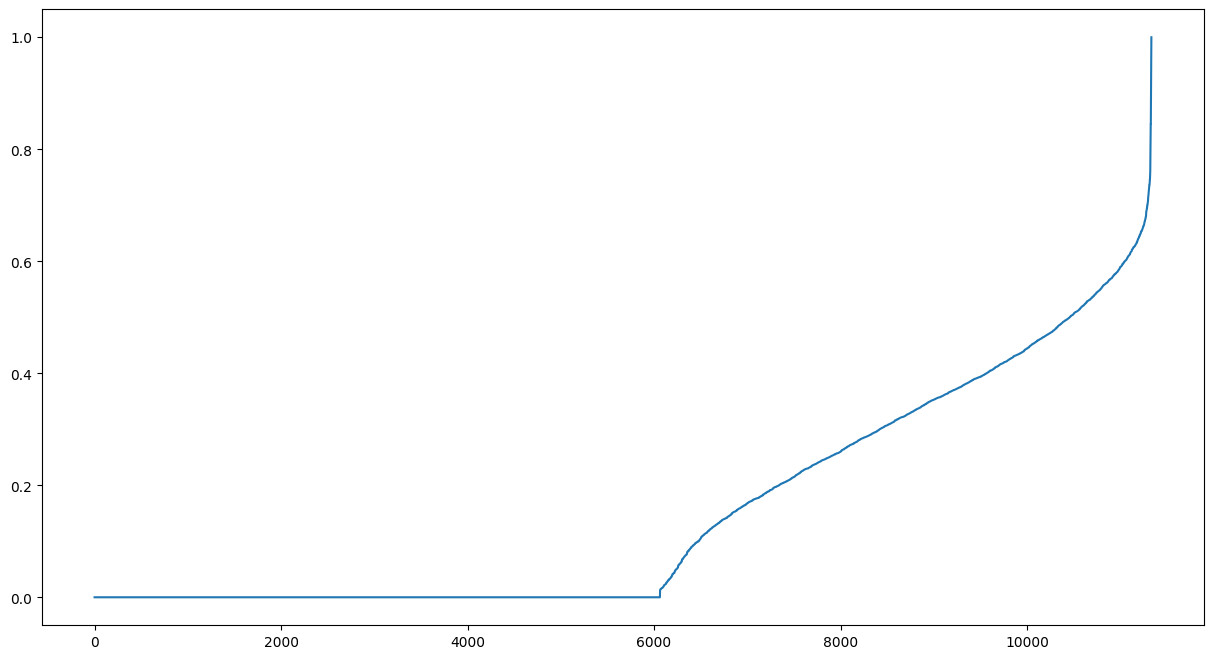

In [21]:
neighbors = NearestNeighbors(n_neighbors=10, metric='cosine')
neighbors_fit = neighbors.fit(TFIDF_X)
distances, indices = neighbors_fit.kneighbors(TFIDF_X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
## plot per cluster silhouette coefficient
def plot_clusterwise_silhouette(data, cluster_labels, widht, height, min_v, max_v):
    matplotlib.rcParams['ps.useafm']=True
    matplotlib.rcParams['pdf.use14corefonts']=True
    matplotlib.rcParams['text.usetex']=True
    #prepare data
    # df = data.as_matrix()
    df = data
    silhouette_scores = []
    # unique clusters
    n_clusters = len(set(cluster_labels))
    
    plt.figure(figsize=(widht, height))
    # get axis for plot
    ax = plt.gca()

    ax.set_xlim([min_v, max_v])
    ax.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in sorted(set(cluster_labels)):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        print(i, " ", np.mean(ith_cluster_silhouette_values), " Cluster size: ", len(ith_cluster_silhouette_values))
        silhouette_scores.append(np.mean(ith_cluster_silhouette_values))
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        # color = plt.cm.spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        if i >= 0:
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        else:
            ax.text(0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    # ax.axvline(x=silhouette_avg_nomisc, color="blue", linestyle="-.")
    
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks(np.arange(min_v, max_v+0.1, 0.2))
    #plt.show()
    return plt, silhouette_scores

In [ ]:
from itertools import cycle, islice

default_base = {
                    'plot_index_x': 0,
                    'plot_index_y': 1,
                    'plot_half_width': 0.5,
                    'plot_half_height': 0.5}

params = default_base.copy()

plt.rcParams['figure.figsize'] = (15, 8) 

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims3 = tsne.fit_transform(TFIDF_X)
x = [x for x,y in vis_dims3]
y = [y for x,y in vis_dims3]

In [ ]:
params = {
    'n_clusters': None,
    'distance_threshold': 0.962,
    'compute_full_tree': True,
    'metric': 'cosine',
    'linkage': 'average',
}

db = AgglomerativeClustering(**params).fit(TFIDF_X)
labels = db.labels_
df['cluster']=labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print("Total clusters: ", n_clusters_)

Estimated number of clusters: 171
Estimated number of noise points: 0
Total clusters:  171


Threshold:  100
For n_clusters = 171 The average silhouette_score is : 0.06499931486543642
0   0.054016281736527554  Cluster size:  75
1   0.02156396176204829  Cluster size:  100
2   0.04945681010340403  Cluster size:  1493
3   0.033956523048637256  Cluster size:  169
4   0.07367285789334403  Cluster size:  121
5   0.03155340768638769  Cluster size:  62
6   0.026770474516013117  Cluster size:  467
7   0.03792284230863807  Cluster size:  24
8   0.027052687851165515  Cluster size:  93
9   0.0027347304990277743  Cluster size:  439
10   0.17133325715625347  Cluster size:  41
11   0.028032604169825504  Cluster size:  18
12   0.12204853728327351  Cluster size:  83
13   0.1768464470421788  Cluster size:  60
14   0.17692306188560317  Cluster size:  49
15   0.05117966732056912  Cluster size:  54
16   0.23724039001609332  Cluster size:  158
17   0.025858171784546337  Cluster size:  36
18   0.04591574149667662  Cluster size:  1286
19   0.026464454989042503  Cluster size:  67
20   0.03599171671458

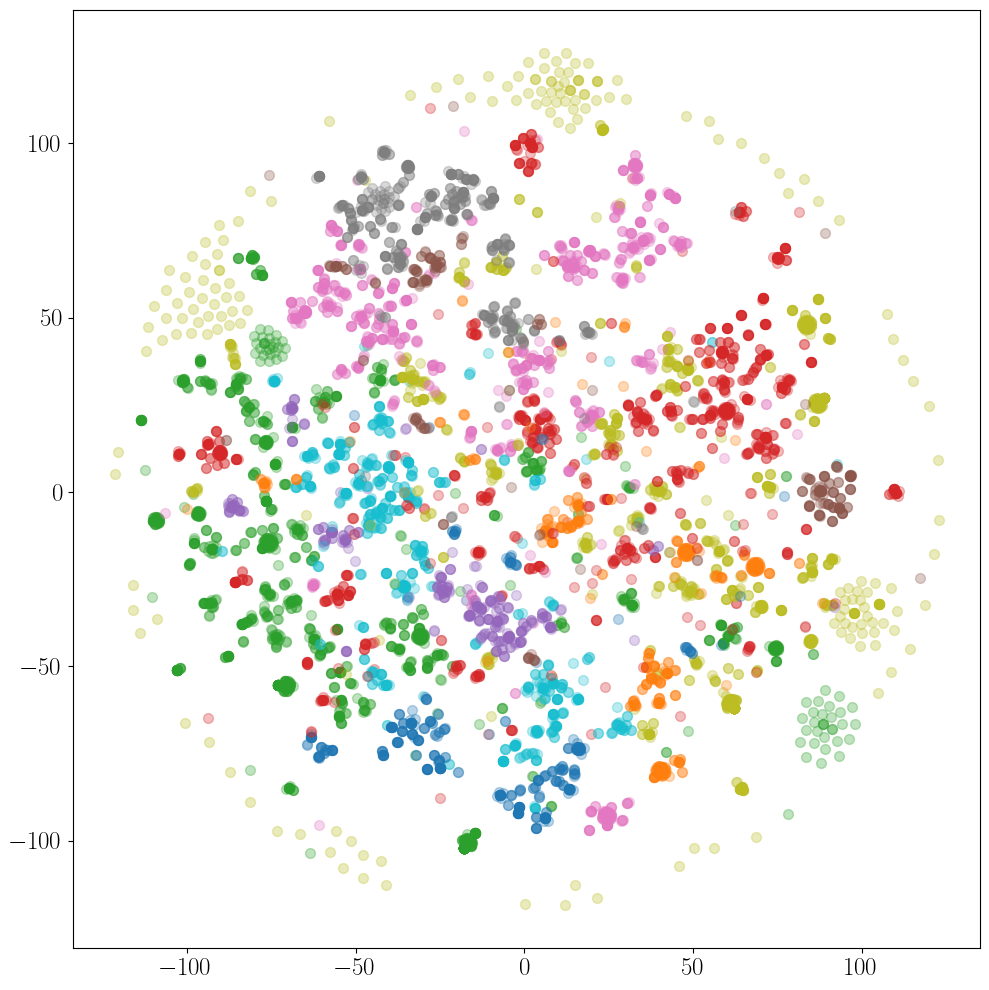

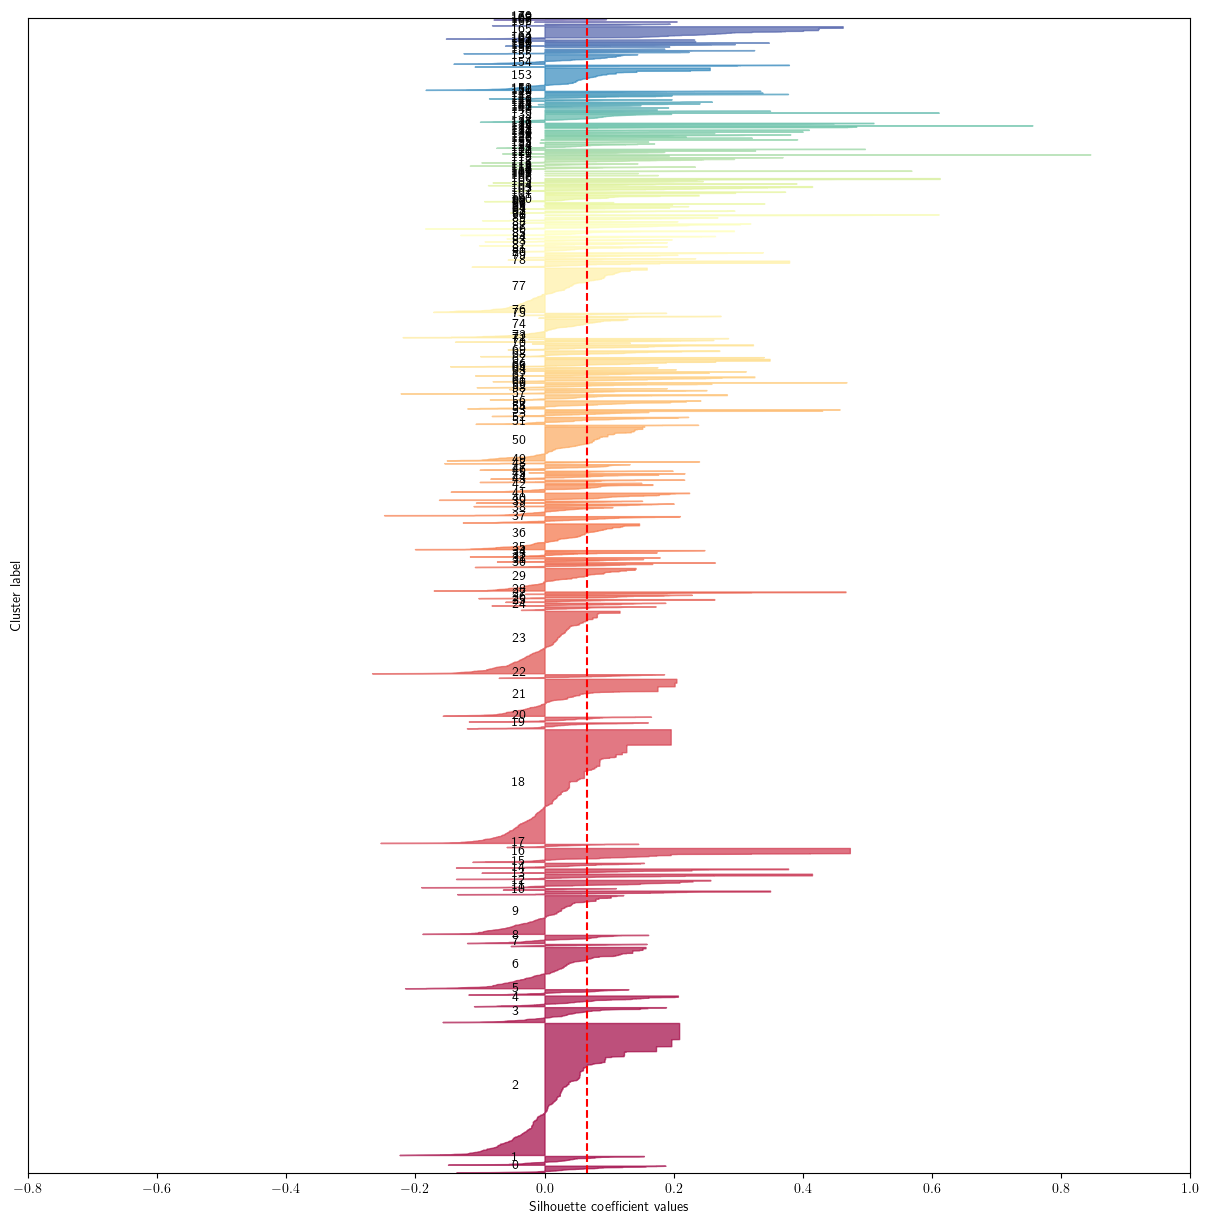

In [ ]:
palette = sns.color_palette(None, n_clusters_+1).as_hex()

big_clusters = 0
big_clusters_size = 0
# cluster_size_threshold = len(labels) / 100.0
cluster_size_threshold = 100
print("Threshold: ", cluster_size_threshold)

# plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [10, 10]
fig, ax = plt.subplots()
for category, color in enumerate(palette):
    # category = category +-1
    size = len(df.loc[df['cluster'] == category]['Response'])
    if size <= cluster_size_threshold:
        continue
    big_clusters +=1
    big_clusters_size += size
    xs = np.array(x)[df.cluster==category]
    ys = np.array(y)[df.cluster==category]
    # print(category, len(xs))

    plt.scatter(xs, ys, color=color, alpha=0.3, s=50)

    avg_x = xs.mean()
    avg_y = ys.mean()

plot_title = "Reduced Dimension: Embeddings visualized using t-SNE. C= "+str(big_clusters)+ " N="+ str(big_clusters_size)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


plt.tight_layout()
# plt.show()
plt.savefig('Clustering_Result/scatter_plot_clusters_updated.pdf', format='pdf', dpi=1200)

labels = df['cluster']
plts, silhouette_scores = plot_clusterwise_silhouette(TFIDF_X, labels, 15, 15, -0.8, 1)

# plts.show()

In [50]:
big_clusters = 0
big_clusters_size = 0
# big_cluster_thresh = cluster_size_threshold
big_cluster_thresh = 100
big_clusters_IDs = []

for i in range(n_clusters_):
    t_df = df.loc[df['cluster'] == i][['Response', 'Theme']]
    t_df_sampled = t_df.sample(frac=0.1)
    t_df_styler = t_df_sampled.style.set_properties(**{'text-align': 'left'})
    print("Cluster: ", i, " Len:", len(t_df), " Silhouette score:", silhouette_scores[i])
    if len(t_df) > big_cluster_thresh:
        big_clusters+=1
        big_clusters_size += len(t_df)
        big_clusters_IDs.append(i)
        display(t_df_styler)
        print("------------------------------------------------------------------------------------------------------")

print("Big clusters > " + str(big_cluster_thresh) +": "+ str(big_clusters) + " Size: "+ str(big_clusters_size))

Cluster:  0  Len: 75  Silhouette score: 0.054016281736527554
Cluster:  1  Len: 100  Silhouette score: 0.02156396176204829
Cluster:  2  Len: 1493  Silhouette score: 0.04945681010340403


------------------------------------------------------------------------------------------------------
Cluster:  3  Len: 169  Silhouette score: 0.033956523048637256


------------------------------------------------------------------------------------------------------
Cluster:  4  Len: 121  Silhouette score: 0.07367285789334403


------------------------------------------------------------------------------------------------------
Cluster:  5  Len: 62  Silhouette score: 0.03155340768638769
Cluster:  6  Len: 467  Silhouette score: 0.026770474516013117


------------------------------------------------------------------------------------------------------
Cluster:  7  Len: 24  Silhouette score: 0.03792284230863807
Cluster:  8  Len: 93  Silhouette score: 0.027052687851165515
Cluster:  9  Len: 439  Silhouette score: 0.0027347304990277743


------------------------------------------------------------------------------------------------------
Cluster:  10  Len: 41  Silhouette score: 0.17133325715625347
Cluster:  11  Len: 18  Silhouette score: 0.028032604169825504
Cluster:  12  Len: 83  Silhouette score: 0.12204853728327351
Cluster:  13  Len: 60  Silhouette score: 0.1768464470421788
Cluster:  14  Len: 49  Silhouette score: 0.17692306188560317
Cluster:  15  Len: 54  Silhouette score: 0.05117966732056912
Cluster:  16  Len: 158  Silhouette score: 0.23724039001609332


------------------------------------------------------------------------------------------------------
Cluster:  17  Len: 36  Silhouette score: 0.025858171784546337
Cluster:  18  Len: 1286  Silhouette score: 0.04591574149667662


------------------------------------------------------------------------------------------------------
Cluster:  19  Len: 67  Silhouette score: 0.026464454989042503
Cluster:  20  Len: 54  Silhouette score: 0.03599171671458606
Cluster:  21  Len: 419  Silhouette score: 0.06208003580988644


------------------------------------------------------------------------------------------------------
Cluster:  22  Len: 42  Silhouette score: 0.07440356094136893
Cluster:  23  Len: 706  Silhouette score: 0.004811669338920665


------------------------------------------------------------------------------------------------------
Cluster:  24  Len: 40  Silhouette score: 0.04665334145256498
Cluster:  25  Len: 31  Silhouette score: 0.08239717612927334
Cluster:  26  Len: 32  Silhouette score: 0.09141871633064204
Cluster:  27  Len: 38  Silhouette score: 0.09511135418606
Cluster:  28  Len: 28  Silhouette score: 0.2678368491316966
Cluster:  29  Len: 256  Silhouette score: 0.029019874269278073


------------------------------------------------------------------------------------------------------
Cluster:  30  Len: 37  Silhouette score: 0.05153831079862848
Cluster:  31  Len: 5  Silhouette score: 0.17618210590817557
Cluster:  32  Len: 29  Silhouette score: 0.06131629944390222
Cluster:  33  Len: 8  Silhouette score: 0.07753087038022344
Cluster:  34  Len: 48  Silhouette score: 0.024252556061896625
Cluster:  35  Len: 15  Silhouette score: 0.12609557182450246
Cluster:  36  Len: 291  Silhouette score: 0.037736878847413224


------------------------------------------------------------------------------------------------------
Cluster:  37  Len: 73  Silhouette score: 0.05599321763293749
Cluster:  38  Len: 92  Silhouette score: 0.004212468548802688
Cluster:  39  Len: 29  Silhouette score: 0.10261950803911692
Cluster:  40  Len: 22  Silhouette score: 0.06313223960933777
Cluster:  41  Len: 82  Silhouette score: 0.11466096171839354
Cluster:  42  Len: 86  Silhouette score: 0.041196932100001665
Cluster:  43  Len: 4  Silhouette score: 0.11674382972672603
Cluster:  44  Len: 27  Silhouette score: 0.06793797803499099
Cluster:  45  Len: 45  Silhouette score: 0.037529900325522274
Cluster:  46  Len: 7  Silhouette score: 0.15539437795625707
Cluster:  47  Len: 19  Silhouette score: 0.07881523395570048
Cluster:  48  Len: 64  Silhouette score: 0.039522917771410704
Cluster:  49  Len: 22  Silhouette score: 0.04622332756008279
Cluster:  50  Len: 385  Silhouette score: 0.05040692772003292


------------------------------------------------------------------------------------------------------
Cluster:  51  Len: 8  Silhouette score: 0.1372427631151176
Cluster:  52  Len: 79  Silhouette score: 0.05955208109928625
Cluster:  53  Len: 47  Silhouette score: 0.05315545323986333
Cluster:  54  Len: 3  Silhouette score: 0.27461483604204734
Cluster:  55  Len: 5  Silhouette score: 0.2877612431957207
Cluster:  56  Len: 92  Silhouette score: 0.07518647906618689
Cluster:  57  Len: 59  Silhouette score: 0.08745530858233315
Cluster:  58  Len: 38  Silhouette score: 0.08046428411116226
Cluster:  59  Len: 11  Silhouette score: 0.07101815636943985
Cluster:  60  Len: 40  Silhouette score: 0.08143567668988444
Cluster:  61  Len: 8  Silhouette score: 0.2604323849406946
Cluster:  62  Len: 55  Silhouette score: 0.1723592991955771
Cluster:  63  Len: 33  Silhouette score: 0.111167418474916
Cluster:  64  Len: 5  Silhouette score: 0.17209265593976936
Cluster:  65  Len: 12  Silhouette score: 0.11572621307

------------------------------------------------------------------------------------------------------
Cluster:  75  Len: 22  Silhouette score: 0.11919055069577009
Cluster:  76  Len: 24  Silhouette score: 0.07989676755879478
Cluster:  77  Len: 501  Silhouette score: 0.02378707510155626


------------------------------------------------------------------------------------------------------
Cluster:  78  Len: 70  Silhouette score: 0.1720802178965612
Cluster:  79  Len: 17  Silhouette score: 0.08162181339773582
Cluster:  80  Len: 29  Silhouette score: 0.09228008144600894
Cluster:  81  Len: 18  Silhouette score: 0.19151264049827552
Cluster:  82  Len: 58  Silhouette score: 0.06245237205461203
Cluster:  83  Len: 35  Silhouette score: 0.08364143083928709
Cluster:  84  Len: 23  Silhouette score: 0.07000253026143292
Cluster:  85  Len: 29  Silhouette score: 0.10245920121880238
Cluster:  86  Len: 52  Silhouette score: 0.0888680096287838
Cluster:  87  Len: 1  Silhouette score: 0.0
Cluster:  88  Len: 58  Silhouette score: 0.14857807364536654
Cluster:  89  Len: 15  Silhouette score: 0.1080951579701271
Cluster:  90  Len: 36  Silhouette score: 0.11798774459521717
Cluster:  91  Len: 1  Silhouette score: 0.0
Cluster:  92  Len: 10  Silhouette score: 0.46180642401441363
Cluster:  93  Len: 

------------------------------------------------------------------------------------------------------
Cluster:  154  Len: 22  Silhouette score: 0.18288706095899823
Cluster:  155  Len: 109  Silhouette score: 0.04255447260163882


------------------------------------------------------------------------------------------------------
Cluster:  156  Len: 16  Silhouette score: 0.054030047312956964
Cluster:  157  Len: 10  Silhouette score: 0.1922573854517127
Cluster:  158  Len: 5  Silhouette score: 0.1256675305071634
Cluster:  159  Len: 1  Silhouette score: 0.0
Cluster:  160  Len: 4  Silhouette score: 0.11539668540246689
Cluster:  161  Len: 20  Silhouette score: 0.1782415556170402
Cluster:  162  Len: 5  Silhouette score: 0.25548080254072114
Cluster:  163  Len: 3  Silhouette score: 0.14139766603833417
Cluster:  164  Len: 11  Silhouette score: 0.10037144958987049
Cluster:  165  Len: 141  Silhouette score: 0.2829269758649059


------------------------------------------------------------------------------------------------------
Cluster:  166  Len: 19  Silhouette score: 0.10292252464418272
Cluster:  167  Len: 1  Silhouette score: 0.0
Cluster:  168  Len: 4  Silhouette score: 0.08387860732425358
Cluster:  169  Len: 1  Silhouette score: 0.0
Cluster:  170  Len: 6  Silhouette score: 0.04414708988494312
Big clusters > 100: 17 Size: 7403


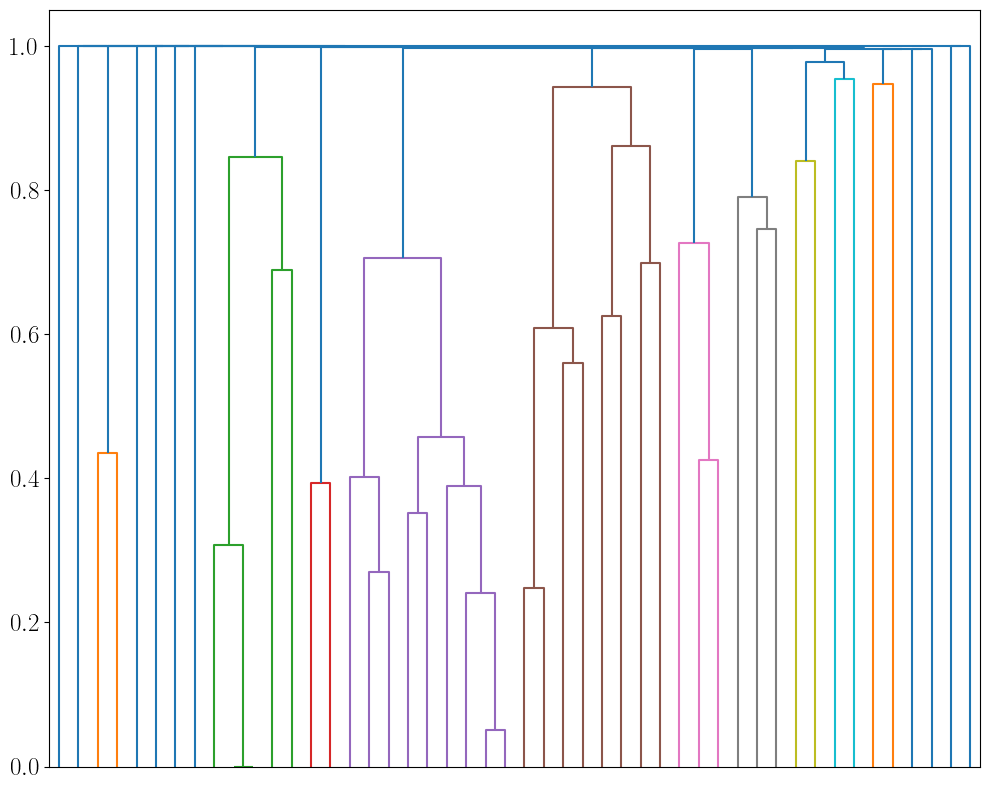

In [37]:
def plot_dendrogram(model, **kwargs):

    plt.figure(figsize=(10,8))
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.tick_params(axis='y', labelsize=18)
    plt.tight_layout()
    plt.savefig('dandogram.pdf', format='pdf', dpi=1200)


plot_dendrogram(db, truncate_mode="level", p=15, leaf_font_size=10, leaf_rotation=90, color_threshold=0.962, no_labels=True)
# plot_dendrogram(db, truncate_mode="lastp", p=30)

In [51]:
def getClusterCosSimilarity(clusterID):
    cosine_similarities = []
    xs = list(np.array(x)[df.cluster==clusterID])
    ys = list(np.array(y)[df.cluster==clusterID])
    for i in range(len(xs)):
        for j in range(len(ys)):
            if i >= j:
                continue
            cos_similarity = 1.0 - scipy.spatial.distance.cosine([xs[i], ys[i]],[xs[j], ys[j]])
            cosine_similarities.append(cos_similarity)
    mean_cos_sim = np.mean(cosine_similarities)
    return mean_cos_sim

In [ ]:
# In paper cluster IDs are remapped to 0 to 16, For example: ID: 2 -> 0, ID: 3 -> 1, ID: 4 -> 2, ..., ID 165 -> 16
for ID in big_clusters_IDs:
    print("Cluster ID: ", ID, " Cosine similarity within cluster: ", getClusterCosSimilarity(ID))

Cluster ID:  2  Cosine similarity within cluster:  0.4229138442344279
Cluster ID:  3  Cosine similarity within cluster:  0.3914788803420432
Cluster ID:  4  Cosine similarity within cluster:  0.7631792358715426
Cluster ID:  6  Cosine similarity within cluster:  0.8831176160028933
Cluster ID:  9  Cosine similarity within cluster:  0.811244919762404
Cluster ID:  16  Cosine similarity within cluster:  0.12302014794471954
Cluster ID:  18  Cosine similarity within cluster:  0.23186232876715
Cluster ID:  21  Cosine similarity within cluster:  0.5610236319211557
Cluster ID:  23  Cosine similarity within cluster:  0.6819094418472295
Cluster ID:  29  Cosine similarity within cluster:  0.7866410073850727
Cluster ID:  36  Cosine similarity within cluster:  0.9045201931982146
Cluster ID:  50  Cosine similarity within cluster:  0.8298004396126225
Cluster ID:  74  Cosine similarity within cluster:  0.9031950993786935
Cluster ID:  77  Cosine similarity within cluster:  0.9158597183664592
Cluster ID:  